# Exercice 1#


# 1)  Le modèle linéaire 
Dans cette première partie notre objectif est de déterminer sur un ensemble de données
un estimateur linéaire de la concentration en ozone à partir des variables suivantes :
* le rayonnement solaire
* la force du vent 
* la température
* le jour de la mesure
* le mois de la mesure

soit le modèle linéaire avec condition gaussienne :

Y = X$\theta$ + $\epsilon$ où X est une matrice (n,p) de rang p,
Y$\in\mathbb{R}^n$ et
$\theta$ est un vecteur inconnu de $\mathbb{R}^p$
tel que $\epsilon$ est un vecteur de n réalisations indépendantes d’une v.a.
gaussienne de moyenne 0 et de variance $\sigma^2*\mathsf{I}d$
tel que $\epsilon\sim\mathcal{N}(0_n,\sigma^2*\mathsf{I}d)$.
On peut aussi noter $y_i = {\theta}_0^{*} + \sum_{j=1}^{p} {\theta}_j^{*}x_{ij} + {\epsilon}_i$
avec ${\epsilon}_i = {\cal{N}}(0,{\sigma}^2)~~~~ \forall$ i = 1,...,n



# 2) Importation des données 'airquality' dans un dataframe


In [12]:
# -*- coding: utf-8 -*-
#
#Importation des librairies nécessaires
#
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.datasets as sm
from IPython.display import display, Math, Latex
import statsmodels.api as sa
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline
sb.set_context('notebook')
sb.set_style('darkgrid')
sb.set_palette('colorblind')

dataset = sm.get_rdataset('airquality').data
dataset.head()


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.4,67,5,1
1,36,118,8.0,72,5,2
2,12,149,12.6,74,5,3
3,18,313,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


# 3) Suppression des lignes nulles de notre dataset

In [13]:
dataset = dataset.dropna()
dataset.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190,7.4,67,5,1
1,36,118,8.0,72,5,2
2,12,149,12.6,74,5,3
3,18,313,11.5,62,5,4
6,23,299,8.6,65,5,7


# 4) Régression linéaire de 'Ozone' sur les autres variables explicatives

In [14]:
from sklearn import linear_model
y_train = dataset['Ozone']
x_train = dataset[['Solar.R','Wind','Temp','Month','Day']]
x_scaled = (x_train - np.mean(x_train))/np.std(x_train)
skl_linmod_ozone_scaled = linear_model.LinearRegression()
skl_linmod_ozone_scaled.fit(x_scaled,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 5) Estimation de $\hat{\theta}$ par regression linéaire

In [15]:
theta_hat = skl_linmod_ozone_scaled.coef_.astype(float)
theta_hat_ = np.insert(skl_linmod_ozone_scaled.coef_,0,skl_linmod_ozone_scaled.intercept_.astype(float),axis=None)
display(Math(r'$\widehat\theta = \begin{bmatrix}'+r'{0}'.format(theta_hat_[0])+r'\\{0}'.format(theta_hat_[1])+r'\\{0}'.format(theta_hat_[2])+r'\\{0}'.format(theta_hat_[3])+r'\\{0}'.format(theta_hat_[4])+r'\\{0}'.format(theta_hat_[5])+r'\end{bmatrix}$'))


<IPython.core.display.Math object>

l'estimateur sans biais de la variance $\hat{\sigma^2}$ = $\frac{\Vert Y-\hat{Y}\Vert^2}{n-rang(X)}$
où Y - $\hat{Y}$ est le vecteur résidus avec $\hat{Y}$ = X$\hat{\theta}$ 

In [16]:
y_hat = skl_linmod_ozone_scaled.predict(x_scaled) 
residus = y_train - y_hat  
norm_2 = residus.T.dot(residus) #calcul de la norme carré des résidus
n = len(y_train)
p = np.linalg.matrix_rank(x_scaled)
var_hat = norm_2/(n - p)
#l'estimateur sans biais de la variance #
display(Math(r'$\hat{\sigma^2}= '+ str(var_hat)))

<IPython.core.display.Math object>

# 6) Intervalle de confiance de niveau 0.01 pour $\hat{\theta}$

In [17]:
#d'apres la prop 1 on peut utiliser la Statistiques de Student avec theta_hat et var_hat
skl_linmod_ozone_original = linear_model.LinearRegression()
skl_linmod_ozone_original.fit(x_train,y_train)


x_new = np.asarray(x_scaled)
x_new = np.insert(x_new,0,np.ones(n),axis=1)


from scipy.stats import t

alpha = 1 - 0.99
t_q = t.ppf(1 - alpha/2,n-p-1)

def left(i):
    """fonction qui calcule la borne inférieure de l'intervalle de confiance pour theta_hat(i)"""
    return theta_hat_[i] - t_q*np.math.sqrt(var_hat*np.linalg.solve(x_new.T.dot(x_new),np.identity(p+1))[i][i])

def right(i):
    """fonction qui calcule la borne suppérieure de l'intervalle de confiance pour theta_hat(i)"""
    return theta_hat_[i] + t_q*np.math.sqrt(var_hat*np.linalg.solve(x_new.T.dot(x_new),np.identity(p+1))[i][i])

def IC(i):
    """intervalle de confiance pour theta_hat(i)"""
    return "[ "+str(left(i))+";"+str(right(i)) + "]"
def IC_size(i):
    """taille de l'intervalle de confiance pour theta_hat(i)"""
    return right(i) - left(i)




#on affiche les intervalles de confiance pour les différents theta_hat(i) avec i=0...4
display(Math(r'$IC^*_0 ={}$'.format(IC(0))))
display(Math(r'$IC^*_1 ={}$'.format(IC(1))))
display(Math(r'$IC^*_2 ={}$'.format(IC(2))))
display(Math(r'$IC^*_3 ={}$'.format(IC(3))))
display(Math(r'$IC^*_4 ={}$'.format(IC(4))))
display(Math(r'$IC^*_5 ={}$'.format(IC(5))))

print " "
print theta_hat_


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

 
[ 42.0990991    4.56193076 -11.75277084  17.98521995  -4.45895297
   2.37393859]


# 7)

On remarque que les variables Day et Month 
sont potentiellement non explicatives du modèle 
étant donné que leurs intervalles de confiance contiennent 0.

# 8) prédiction d'une nouvelle observation

In [18]:
#Création de la nouvelle observation
listenom = ['Solar.R','Wind','Temp','Month','Day']
newline = pd.DataFrame([[197, 10, 70, 3,1]], columns = listenom)

#prédiction de la valeur d'Ozone pour la nouvelle observation
y_newline_pred = skl_linmod_ozone_original.predict(newline)
print "La prédiction pour cette nouvelle observation donne : " 
display(Math(r'$\hat{y}_{new}~~ =~~ '+str(y_newline_pred[0])))



La prédiction pour cette nouvelle observation donne : 


<IPython.core.display.Math object>

# Exercice 2 #

# 1) Methode Bootstrap et comparaison

In [39]:
from sklearn.utils import resample
ListeDeThetaestim_sample=pd.DataFrame()
Comparaison_bootstrap_MCO=pd.DataFrame()
for i in range(0,10000):
    airq_data_resample = resample(dataset,replace='True')
    Ysample = airq_data_resample['Ozone'].astype(float)
    Xsample = airq_data_resample[['Solar.R', 'Wind', 'Temp', 'Month', 'Day']].astype(float)
    # Centrage et Réduction des variables explicatives
    Xsample_mean=np.mean(Xsample)
    Xsample_ecartType = np.std(Xsample)
    Xsample_rescale = (Xsample - Xsample_mean)/Xsample_ecartType
    Xsample_rescale=sa.add_constant(Xsample_rescale)
    theta_estim_sample = sa.OLS(Ysample,Xsample_rescale).fit().params
    ListeDeThetaestim_sample['sample : '+ str(i)]=theta_estim_sample

# Changement des lignes en colonnes    
ListeDeThetaestim_sample=ListeDeThetaestim_sample.T
# Affichage des coefficients estimés pour les 5 premiers samples   
ListeDeThetaestim_sample.head()

,const,Solar.R,Wind,Temp,Month,Day
sample : 0,36.765766,4.851891,-11.147346,16.528148,-5.462481,-0.861120
sample : 1,43.099099,4.591450,-9.525042,18.914255,-5.809601,1.500773
sample : 2,41.450450,4.746100,-10.281240,17.733888,-3.917209,-0.214399
sample : 3,39.207207,5.084189,-9.737620,15.365386,-5.546091,5.514874
sample : 4,41.621622,3.219427,-12.603817,20.475984,-3.740661,2.745304


In [40]:
# Comparaison des valeurs de l'exercice 1 et du bootstrap 
Comparaison_bootstrap_MCO["MCO pur"] = theta_hat_
Comparaison_bootstrap_MCO["bootstr+moy"] = ListeDeThetaestim_sample.mean().as_matrix()

Comparaison_bootstrap_MCO["bootstr+med"] = ListeDeThetaestim_sample.median().as_matrix()
Moyenne_des_coefficients = Comparaison_bootstrap_MCO.mean(axis=1)
Ecart_type_des_coefficients = Comparaison_bootstrap_MCO.std(axis=1)

Comparaison_bootstrap_MCO["moy 3 methodes"] = Moyenne_des_coefficients
Comparaison_bootstrap_MCO["std 3 methodes"] = Ecart_type_des_coefficients

Comparaison_bootstrap_MCO.rename(index={0:'Const',1:'Solar.R',2:'Wind',3:'Temp',4:'Month',5:'Day'})

,MCO pur,bootstr+moy,bootstr+med,moy 3 methodes,std 3 methodes
Const,42.099099,42.104583,42.036036,42.079906,0.038091
Solar.R,4.561931,4.553016,4.517303,4.544083,0.023617
Wind,-11.752771,-11.770358,-11.609729,-11.710953,0.088102
Temp,17.985220,17.906799,17.925456,17.939158,0.040967
Month,-4.458953,-4.413703,-4.429030,-4.433895,0.023014
Day,2.373939,2.412379,2.447198,2.411172,0.036645


# 2) Intervalle de confiance de niveau 99% avec les quantiles empiriques de bootstrap

In [192]:
ListeDeThetaestim_sample.quantile([.005,.995])

,const,Solar.R,Wind,Temp,Month,Day
0.005,34.576532,0.116493,-20.357719,11.994380,-9.603628,-3.065352
0.995,50.558604,9.423640,-5.252764,23.729932,0.642715,7.730653


# 3) impact du nombre d'échantillon du bootstrap

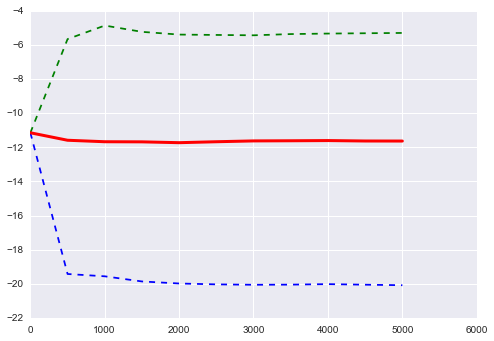

In [46]:
tableau_de_IC=pd.DataFrame(columns=["B",'0.005','0.995','MED'])
for i in np.linspace(1,5001,11):
    tableau_de_IC.loc[int(i),"B"]=int(i)
    tableau_de_IC.loc[int(i),'0.005']=ListeDeThetaestim_sample[0:int(i)].quantile([.005]).iloc[0,2]
    tableau_de_IC.loc[int(i),'0.995']=ListeDeThetaestim_sample[0:int(i)].quantile([.995]).iloc[0,2]
    tableau_de_IC.loc[int(i),'MED']=ListeDeThetaestim_sample.iloc[0:int(i),2].median()
    
plt.plot(tableau_de_IC.iloc[:,0],tableau_de_IC.iloc[:,1],'b--')
plt.plot(tableau_de_IC.iloc[:,0],tableau_de_IC.iloc[:,2],'g--')
plt.plot(tableau_de_IC.iloc[:,0],tableau_de_IC.iloc[:,3],linewidth=3,color='red')
plt.show()

# 4) régression de Ozone sur wind

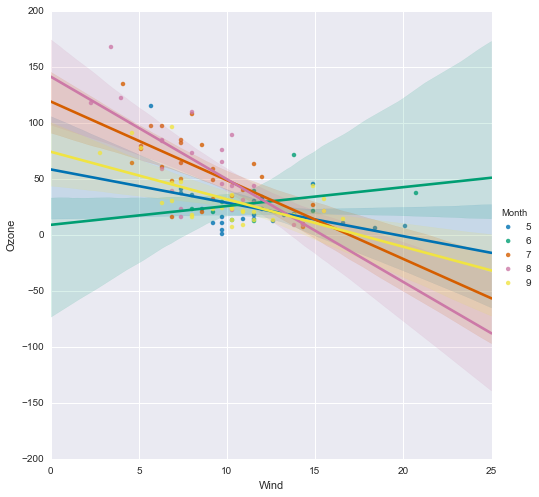

In [47]:
sb.lmplot('Wind','Ozone',hue='Month',data=dataset,size=7)

On remarque que le mois de Juin présente des résultats atypiques par rapport aux autres mois au niveau de la concentration en Ozone. en effet tous les coefficients directeurs des droites de regression des autres mois sont négatives sauf celle du mois de Juin.

# Exercice 3

# 1)

In [172]:
def stpforward(y, X, M):
    r = y
    S = []
    theta = np.zeros([X.shape[1], ])
    for i in range(M):
        theta_int = []
        S_c = list(filter(lambda u: u not in S, range(X.shape[1])))
        alpha_j = []
        for j in S_c:
            alpha_j.append(abs(np.dot(X[X.columns[j]], r)))
        jmax = np.argmax(alpha_j)
        S.append(S_c[jmax])
        Mat_Xs = pd.DataFrame([])
        for indice in S:
            Mat_Xs_int = pd.DataFrame(X[X.columns[indice]])
            Mat_Xs = pd.concat([Mat_Xs, Mat_Xs_int[Mat_Xs_int.columns[0]]], axis=1)                  
        Regr = linear_model.LinearRegression(normalize=True)
        Regr.fit(Mat_Xs, y)
        Regr_coef = Regr.coef_
        theta_int = Regr_coef
        Regr_intercept = Regr.intercept_
        r = y-np.dot(Mat_Xs, theta_int)
    theta[S] = theta_int
    return theta

# On teste sur les données de l'exercice 1 c'est à dire les variables explicatives centrées réduites et y_train
print stpforward(y_train, x_scaled, 4)

 
    
    

[  4.50045463 -11.74591966  17.7488752   -4.38806519   0.        ]


# 2)

In [190]:
import numpy as np
from sklearn.linear_model.base import LinearModel, _pre_fit
from sklearn.base import RegressorMixin
class MYOMP(LinearModel, RegressorMixin):
    def __init__(self, n_nonzero_coefs=None, fit_intercept=True,
                 normalize=True, precompute='auto'):
        self.n_nonzero_coefs = n_nonzero_coefs
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.precompute = precompute
    
    def fit(self, X, y):
        """Fit the model using X, y as training data.
        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
        Training data.
        y : array-like, shape (n_samples,) or (n_samples, n_targets)
        Target values.
        Returns
        -------
        self : object
        returns an instance of self.
        """
        X, y, X_mean, y_mean, X_std, Gram, Xy = \
        _pre_fit(X, y, None, self.precompute, self.normalize,
        self.fit_intercept, copy=True)
        self.coef_ = stpforward(y, X, M) # MODIFY HERE !!!
        self._set_intercept(X_mean, y_mean, X_std)
        return self


# 3)

In [213]:
MYOMP(dataset,M=5)

TypeError: __init__() got an unexpected keyword argument 'M'

# 4)

In [206]:
from sklearn.linear_model import OrthogonalMatchingPursuit
OrthogonalMatchingPursuit(dataset,4)

OrthogonalMatchingPursuit(fit_intercept=True,
             n_nonzero_coefs=     Ozone  Solar.R  Wind  Temp  Month  Day
0       41      190   7.4    67      5    1
1       36      118   8.0    72      5    2
2       12      149  12.6    74      5    3
3       18      313  11.5    62      5    4
6       23      299   8.6    65      5    7
7       19       99 ...     131   8.0    76      9   29
152     20      223  11.5    68      9   30

[111 rows x 6 columns],
             normalize=True, precompute='auto', tol=4)